In [ ]:
#импортируем библиотеки
import matplotlib.pyplot as plt #matplotlib для визуализации
import numpy as np #numpy для работа с матрицами
import pandas as pd #для хранения истории обучения и ее визуализации
from sklearn.metrics import classification_report#отчет по классификации
from sklearn.metrics import confusion_matrix #матрица ошибок
from sklearn.datasets import load_digits #загрузчик датасетов
from sklearn.model_selection import train_test_split #авторазбиение
from tensorflow.keras.models import Sequential #последовательная модель (прямого распространения)
from tensorflow.keras.layers import Dense #полносвязный слой
from tensorflow.keras import optimizers #оптимизаторы
from tensorflow.keras.utils import to_categorical #преобразование в категориальные данные


#загружаем датасет с рукописными цифрами
digits = load_digits()

In [ ]:
#изучим форматы хранения
print('Количество изображений и их ширина и высота: ', digits.images.shape) #1797 изображений размером 8x8
print('Количество объектов и признаков в данных: ', digits.data.shape) #1797 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток: ', digits.target.shape) #1797 лейблов

Количество изображений и их ширина и высота:  (1797, 8, 8)
Количество объектов и признаков в данных:  (1797, 64)
Количество меток:  (1797,)


Text(0.5, 1.0, 'image label: 1')

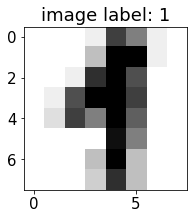

In [ ]:
#выведем одно изображение для примера
sample_index = 90 #номер случайного изображения
plt.figure(figsize=(3, 3)) #размер фигуры для визуализации
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest') #вывод изображения в ч/б формате
plt.title("image label: %d" % digits.target[sample_index]) #подпись изображения с классом картинки

In [ ]:
#получим все данные и оставим только изображения 0 и 1
data = np.asarray(digits.data, dtype='float32') #преобразуем данные входа в массив numpy
target = np.asarray(digits.target, dtype='int32') #преобразуем данные выхода в массив numpy
data01 = data[target <=1] #входы для 0 и 1
target01 = target[target <=1] #выходы для 0 и 1

In [ ]:
#изучим форматы хранения урезанного датасета
print('Количество объектов и признаков в данных: ', data01.shape) #360 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток: ', target01.shape) #360 лейблов

Количество объектов и признаков в данных:  (360, 64)
Количество меток:  (360,)


In [ ]:
#разобьем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(data01, target01, test_size=0.15, random_state=37) #15% на тест, неслучайная повторяемость по состоянию 37
print('Количество объектов и признаков в обучающих данных: ', X_train.shape) #306 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток в обучающих данных: ', y_train.shape) #360 лейблов
print('Количество объектов и признаков в тестовых данных: ', X_test.shape) #360 изображений с 64 признаками (признак - яркость каждого пикселя)
print('Количество меток в тестовых данных: ', y_test.shape) #360 лейблов

Количество объектов и признаков в обучающих данных:  (306, 64)
Количество меток в обучающих данных:  (306,)
Количество объектов и признаков в тестовых данных:  (54, 64)
Количество меток в тестовых данных:  (54,)


In [ ]:
#преобразуем с помощью one-hot encoding в категориальные данные выходные
Y_train = to_categorical(y_train) #создается матрица из K = число классов столбцов, в которой 1 стоит только в том столбце, какое в данной строке было значение y
Y_train[:5] #выведем 5 первых целевых признаков (0, 0, 1, 0, 0)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
#смоделируем нейронную сеть
input_dim = X_train.shape[1] #размер входного слоя (64 признака)
hidden_dim = 128 #размер скрытого слоя (произвольный, выбрали 128 нейронов)
output_dim = Y_train.shape[1] #размер выходного слоя (2 класса)

model = Sequential() #создаем последовательное соединение слоев с прямым распространением
model.add(Dense(hidden_dim, input_dim=input_dim, activation="relu")) #добавляем скрытый слой с активацией relu
model.add(Dense(output_dim, activation="sigmoid")) #создаем выходной слой с активацией сигмоид (важно, что для большего числа классов, чем 2, следует использовать softmax)
#создаем нейронную сеть с методом градиентного спуска и скоростью обучения 0.0015
#в качестве функции потерь выбираем бинарную кросс-энтропию (важно, что для большего числа классов, чем 2, следует использовать категориальную кроссэнтропию)
#в качестве основной метрики оцениваем accuracy (долю верных распознаваний)
model.compile(optimizer=optimizers.SGD(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])
#обучаем модель на train датасете, при этом используем 20% данных в качестве валидации (не используем для подстройки весов)
#обучаем в течение 5 эпох и используем на одном этапе обучения 64 примера
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
4/4 [==============================] - 1s 66ms/step - loss: 2.6385 - accuracy: 0.4426 - val_loss: 1.8869 - val_accuracy: 0.4032
Epoch 2/5
4/4 [==============================] - 0s 14ms/step - loss: 1.5354 - accuracy: 0.5123 - val_loss: 1.1836 - val_accuracy: 0.6452
Epoch 3/5
4/4 [==============================] - 0s 16ms/step - loss: 1.0411 - accuracy: 0.7541 - val_loss: 0.8658 - val_accuracy: 0.8710
Epoch 4/5
4/4 [==============================] - 0s 14ms/step - loss: 0.7724 - accuracy: 0.8648 - val_loss: 0.6771 - val_accuracy: 0.9194
Epoch 5/5
4/4 [==============================] - 0s 17ms/step - loss: 0.5924 - accuracy: 0.9221 - val_loss: 0.5419 - val_accuracy: 0.9194


In [ ]:
#сохраним историю обучения в датафрейме pandas
history_df = pd.DataFrame(history.history) #создаем датафрейм и записываем туда метрики из истории
history_df["epoch"] = history.epoch #создаем столбец с номерами эпох обучения (начинаем с 0)
history_df #выводим датафрейм

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.638527,0.442623,1.886942,0.403226,0
1,1.535373,0.512295,1.183597,0.645161,1
2,1.041078,0.754098,0.865802,0.870968,2
3,0.772422,0.864754,0.677087,0.919355,3
4,0.592420,0.922131,0.541931,0.919355,4


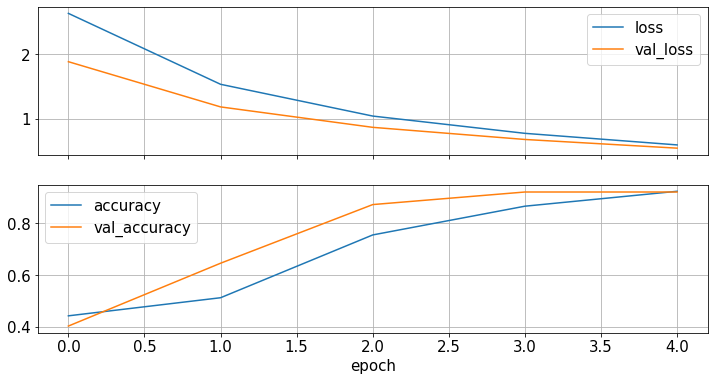

In [ ]:
#строим кривые обучения
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6)) #создаем фигуру и оси для отрисовки 2 графиков
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0, grid=True) #рисуем значения потерь для обучающих и валидационных данных
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, grid=True) #рисуем значения точности для обучающих и валидационных данных

In [ ]:
#сделаем предсказание для выведенного ранее изображения цифры 1
sample_index = 90 #номер случайного изображения (цифра 1)
img = np.asarray(digits.data[sample_index], dtype='float32') #представим изображение в виде массива numpy
img = img.reshape(-1,64) #представим изображение в формате, требуемом для подачи на вход сети
print('Распределение вероятностей: ', model.predict(img)) #выполним предсказание (первое - вероятность 0, второе - вероятность 1)
print('Это было изображение цифры: ', np.argmax(model.predict(img)))

1/1 [==============================] - 0s 59ms/step
Распределение вероятностей:  [[0.00448376 0.01225582]]
1/1 [==============================] - 0s 28ms/step
Это было изображение цифры:  1


In [ ]:
#сделаем прогноз для всех тестовых данных и оценим его
y_pred = np.argmax(model.predict(X_test), axis=1) #прогнозные значения
print('*'*100,'Матрица ошибок', sep='\n')
print(confusion_matrix(y_test,y_pred)) #матрица ошибок (Истинно-положительные, ложно-положительные, ложно-отрицательные, истинно-отрицательные)
print('*'*100,'Отчет о классификации', sep='\n')
print(classification_report(y_test, y_pred)) #отчет о классификации (все метрики)

2/2 [==============================] - 0s 5ms/step
****************************************************************************************************
Матрица ошибок
[[31  2]
 [ 3 18]]
****************************************************************************************************
Отчет о классификации
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



## Кейс №1

Вам необходимо исправить код таким образом, чтобы нейронная сеть могла обучаться всем 10 цифрам. А затем оценить обученную модель. Настраивая параметры обучения, постарайтесь добиться значений точности не менее **90%**.